# Disciplina: Tópicos em Inteligência Computacional
*Instituto Federal do Norte de Minas Gerais Campus Montes Claros*

Curso: Ciência da Computação 

Professora: Luciana Balieiro Cosme

Equipe: Jaudir Aguiar, Jonas Diego, Matheus H. Aguiar 



Importações necessarias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Carragando base de treinamento e teste

In [6]:
casas = fetch_california_housing()
print(casas.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




Transformando os dados em DataFrame

In [7]:
tabela = pd.DataFrame(casas.data)
tabela.columns = casas.feature_names
tabela.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
tabela.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


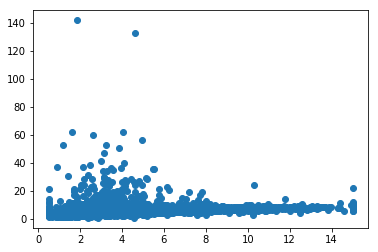

In [9]:
plt.scatter(tabela.MedInc,tabela.AveRooms)

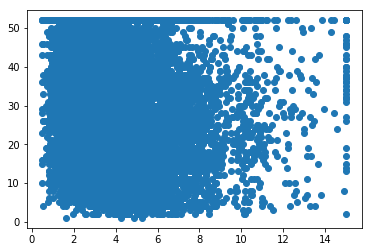

In [10]:
plt.scatter(tabela.MedInc,tabela.HouseAge)

In [11]:
X = tabela[["HouseAge","AveRooms"]]
tam = int(len(X)*0.2)

In [12]:
X_train = X[:-tam]
X_test = X[-tam:]
y_train = tabela.MedInc[:-tam]
y_test = tabela.MedInc[-tam:]

In [13]:
regr = linear_model.LinearRegression()
# treina o modelo
regr.fit(X_train, y_train)

# faz a predição
y_pred = regr.predict(X_test)

In [14]:
# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = -0.01125053*HouseAge + 0.21172182*AveRooms + 2.9877014311533627

Coeficientes: 
 [-0.01125053  0.21172182]
Coeficientes: 
 2.9877014311533627


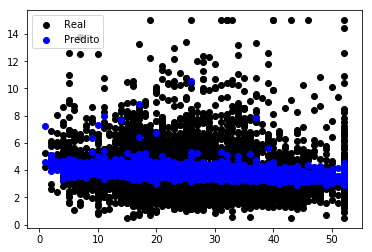

In [27]:
a1 = regr.coef_[0]
a2 = regr.coef_[1]
b = regr.intercept_

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste = a1*X_test["HouseAge"] +a2*X_test["AveRooms"]+b

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear

#plota todos os valores de validação
plt.scatter(X_test["HouseAge"], y_test,  color='black')
plt.scatter(X_test["HouseAge"], y_teste, color='blue')
plt.legend(["Real", "Predito"])

Não há relação linear